<a href="https://colab.research.google.com/github/eutiagovski/projetos-cursos/blob/main/datascience-mentorama/12_Arvores_Ensembles_aula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [5]:
iris = load_iris()

X = iris.data[:, 2:] 
y = iris.target

df = pd.DataFrame(np.c_[X, y], columns=iris.feature_names[2:] + ['flower'])
df['flower_name'] = df.flower.map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.sample(20)

,petal length (cm),petal width (cm),flower,flower_name
21,1.5,0.4,0.0,setosa
130,6.1,1.9,2.0,virginica
127,4.9,1.8,2.0,virginica
126,4.8,1.8,2.0,virginica
72,4.9,1.5,1.0,versicolor
55,4.5,1.3,1.0,versicolor
61,4.2,1.5,1.0,versicolor
123,4.9,1.8,2.0,virginica
117,6.7,2.2,2.0,virginica
103,5.6,1.8,2.0,virginica


In [6]:
df.groupby('flower_name').mean()

,petal length (cm),petal width (cm),flower
flower_name,,,
setosa,1.462,0.246,0.0
versicolor,4.260,1.326,1.0
virginica,5.552,2.026,2.0


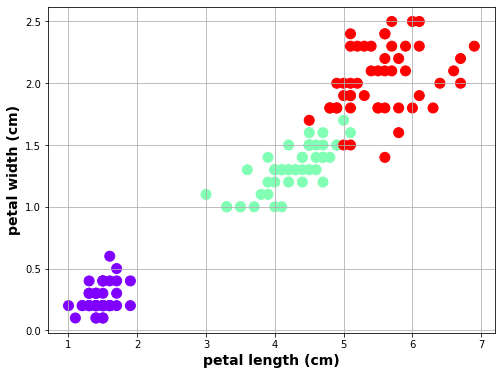

In [7]:
plt.figure(figsize=[8,6])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow, s=100)
plt.xlabel(df.columns[0], fontsize=14, fontweight='bold')
plt.ylabel(df.columns[1], fontsize=14, fontweight='bold')

plt.grid()
plt.show()

In [8]:
from sklearn.tree import DecisionTreeClassifier


In [9]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=0)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [13]:
!dot -Tpng iris_tree.dot -o iris_tree.png

In [14]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [15]:
tree_clf.predict([[5, 1.5]])

array([1])

In [16]:
tree_clf.predict_proba(X)

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

In [17]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

###Aula 3: Regularização de Parâmetros

In [18]:
from sklearn.datasets import make_moons, make_blobs


In [21]:
def geraDados(size=500):
  X, y = make_blobs(n_samples=size, centers=[[0,0], [1,0], [0.5,1]], cluster_std=0.3)
  return X, y

In [22]:
X, y = geraDados()

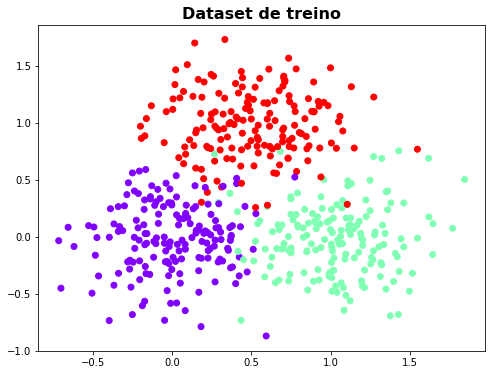

In [23]:
plt.figure(figsize=[8,6])
plt.title('Dataset de treino', fontsize=16, fontweight='bold')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow)
plt.show()

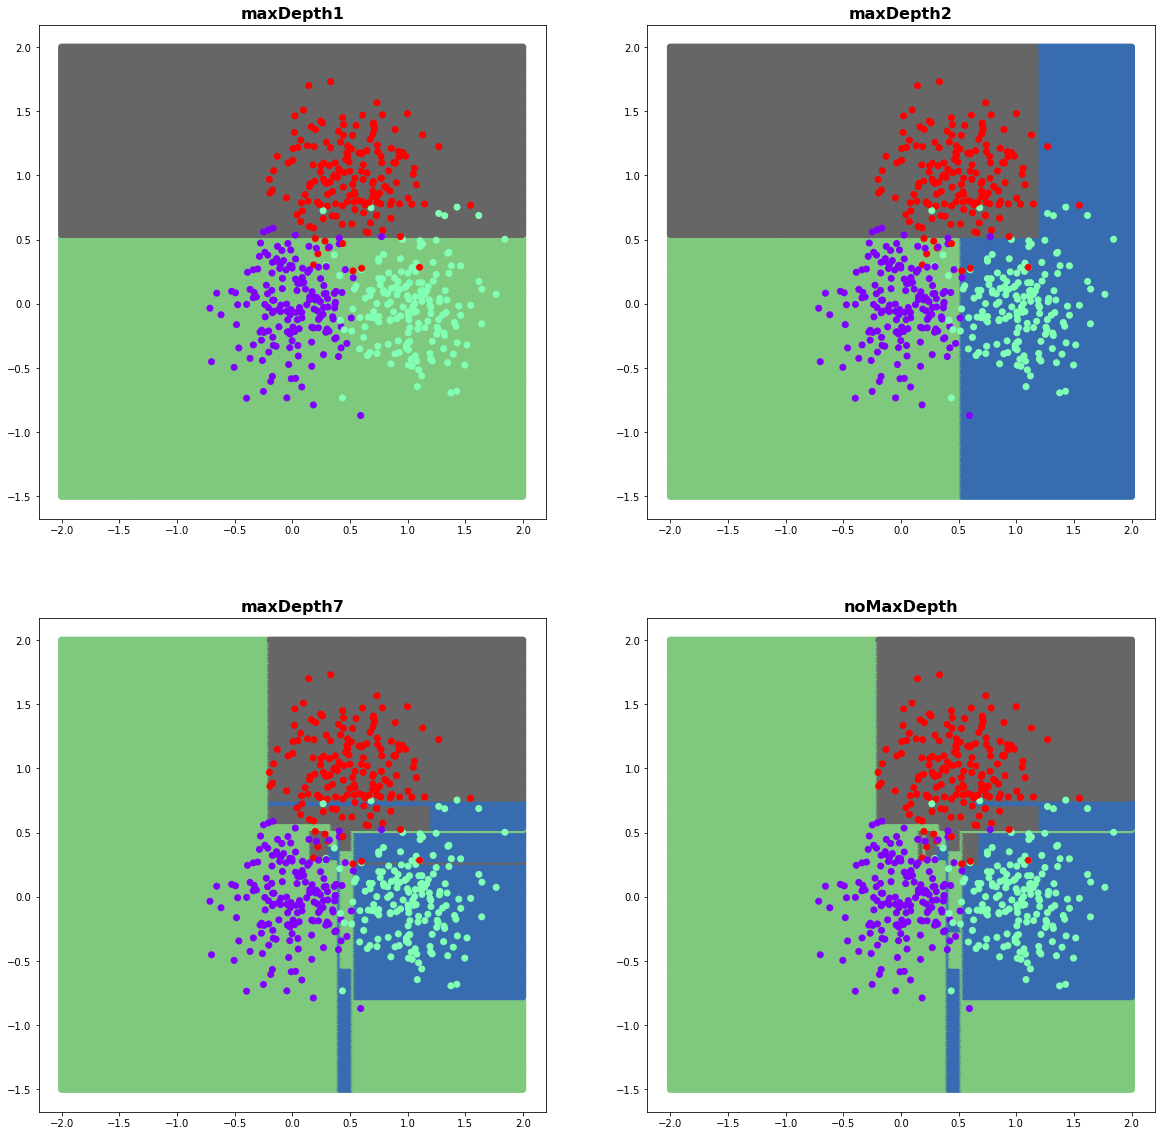

In [24]:
dt1 = DecisionTreeClassifier(max_depth=1)
dt2 = DecisionTreeClassifier(max_depth=2)
dt3 = DecisionTreeClassifier(max_depth=7)
dt4 = DecisionTreeClassifier()

models = [dt1, dt2, dt3, dt4]
nomes = [
         'maxDepth1', 'maxDepth2', 'maxDepth7', 'noMaxDepth'
]

plt.figure(figsize=[20,20])

for i in range(4):
  plt.subplot(2,2,i+1)
  model_i = models[i].fit(X, y)

  s = 200
  xx, yy = np.linspace(-2, 2, s), np.linspace(-1.5,2,s)
  mesh = np.meshgrid(xx, yy)

  xx, yy = mesh

  xx = xx.ravel()
  yy = yy.ravel()

  mesh_X = np.c_[xx, yy]

  plt.scatter(xx, yy, c=model_i.predict(mesh_X), cmap=plt.cm.Accent)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow)
  plt.title(nomes[i], fontsize=16, fontweight='bold')

plt.show()

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
for i in range(4):
  model_i = models[i]

  print(nomes[i])
  print(f'Accuracy: {np.round(accuracy_score(y, model_i.predict(X)), 2)}')
  print()

maxDepth1
Accuracy: 0.64

maxDepth2
Accuracy: 0.95

maxDepth7
Accuracy: 0.99

noMaxDepth
Accuracy: 1.0



In [27]:
Xsim, ysim = geraDados()

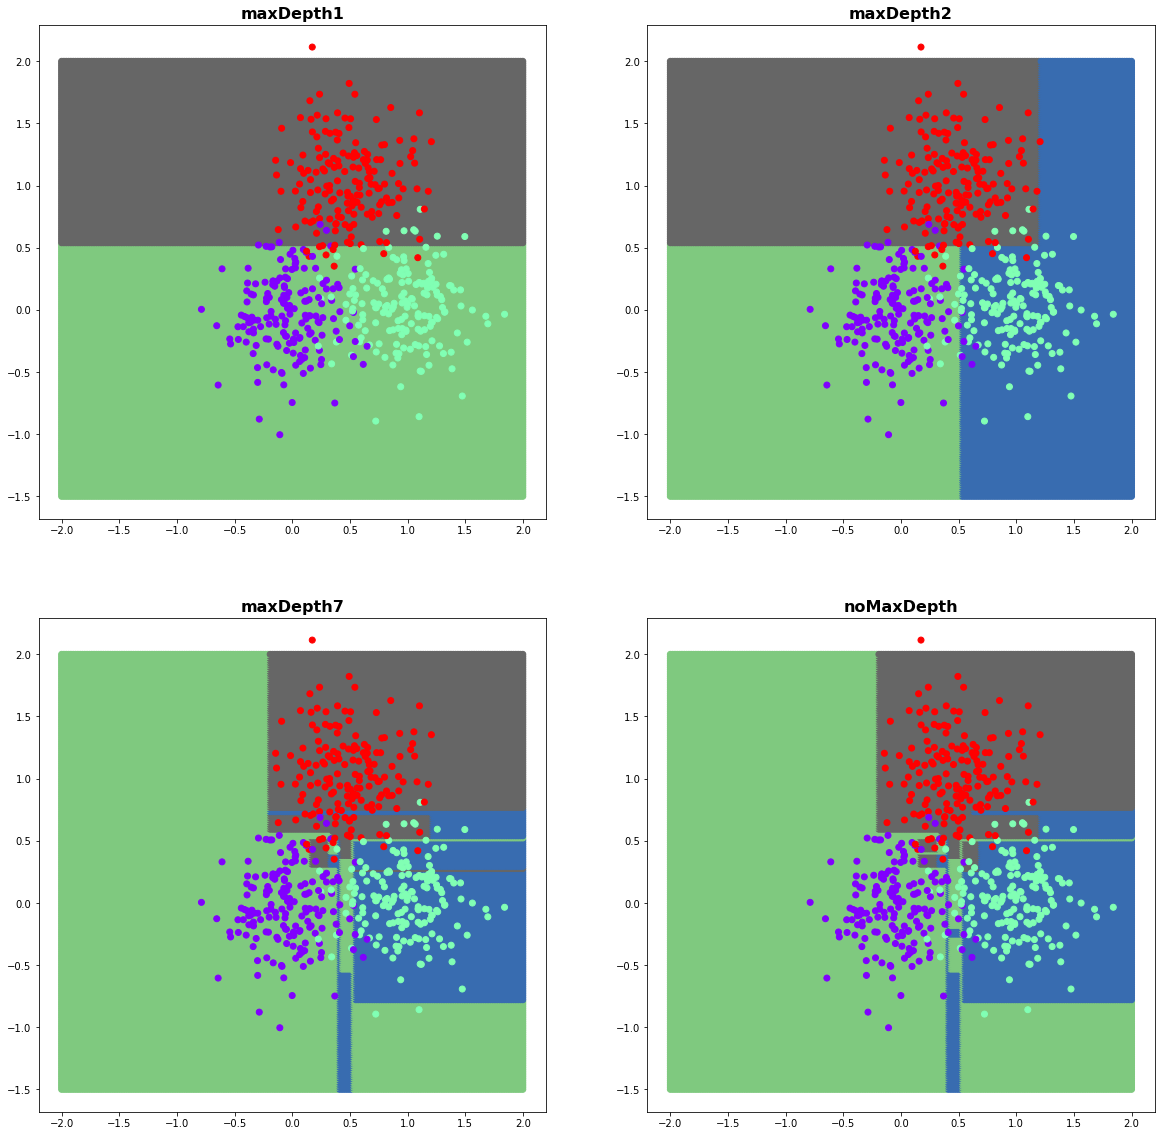

In [28]:
plt.figure(figsize=[20,20])

for i in range(4):
  plt.subplot(2,2,i+1)
  model_i = models[i].fit(X, y)

  s = 200
  xx, yy = np.linspace(-2, 2, s), np.linspace(-1.5,2,s)
  mesh = np.meshgrid(xx, yy)

  xx, yy = mesh

  xx = xx.ravel()
  yy = yy.ravel()

  mesh_X = np.c_[xx, yy]

  plt.scatter(xx, yy, c=model_i.predict(mesh_X), cmap=plt.cm.Accent)
  plt.scatter(Xsim[:, 0], Xsim[:, 1], c=ysim, cmap=plt.cm.rainbow)
  plt.title(nomes[i], fontsize=16, fontweight='bold')

plt.show()

In [29]:
for i in range(4):
  model_i = models[i]

  print(nomes[i])
  print(f'Accuracy: {np.round(accuracy_score(ysim, model_i.predict(Xsim)), 2)}')
  print()

maxDepth1
Accuracy: 0.64

maxDepth2
Accuracy: 0.93

maxDepth7
Accuracy: 0.92

noMaxDepth
Accuracy: 0.93



### Aula 4: Arvores de Regressão